In [140]:
import pandas as pd

In [141]:
import tensorflow

In [142]:
import numpy as np

In [143]:
import matplotlib.pyplot as plt

In [144]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [145]:
df=pd.read_csv("Churn_Modelling.csv")

In [146]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
X=df.iloc[:,3:13]

In [148]:
y=df.iloc[:,13]

In [149]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [150]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [151]:
X["gender"]=pd.get_dummies(X["Gender"],drop_first=True)

In [152]:
geography=pd.get_dummies(X["Geography"],drop_first=True)

In [153]:
X=pd.concat([X,geography],axis=1)

In [154]:
X.drop(["Geography","Gender"],axis=1,inplace=True)

In [155]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [156]:
df["estimated salary"]=df.drop("EstimatedSalary",axis=1,inplace=True)

In [157]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [159]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [160]:
X_train.shape,X_test.shape

((8000, 11), (2000, 11))

## tensorflow

In [210]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [211]:
# lets initialize ANN
classifier=Sequential()

In [229]:
## Adding Input layer
classifier.add(Dense(units=11,activation='relu'))

In [230]:
## Adding First hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.25))

In [231]:
## Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.25))

In [232]:
## Adding Output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [233]:
## Compile
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [234]:
## in adam learning rate is fixed
## ue can udate learning rate as
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [235]:
## Compile
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=["accuracy"])

In [236]:
## early stopping
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [238]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size=1000,epochs=100,callbacks=early_stopping)

Epoch 1/100
6/6 [==============================] - 0s 48ms/step - loss: 0.4545 - accuracy: 0.7962 - val_loss: 0.4543 - val_accuracy: 0.7910
Epoch 2/100
6/6 [==============================] - 0s 27ms/step - loss: 0.4611 - accuracy: 0.7962 - val_loss: 0.4536 - val_accuracy: 0.7910
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.4569 - accuracy: 0.7962 - val_loss: 0.4537 - val_accuracy: 0.7910
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.4587 - accuracy: 0.7962 - val_loss: 0.4532 - val_accuracy: 0.7910
Epoch 5/100
6/6 [==============================] - 0s 30ms/step - loss: 0.4547 - accuracy: 0.7962 - val_loss: 0.4535 - val_accuracy: 0.7910
Epoch 6/100
6/6 [==============================] - 0s 21ms/step - loss: 0.4555 - accuracy: 0.7962 - val_loss: 0.4529 - val_accuracy: 0.7910
Epoch 7/100
6/6 [==============================] - 0s 31ms/step - loss: 0.4590 - accuracy: 0.7962 - val_loss: 0.4501 - val_accuracy: 0.7910
Epoch 8/100
6/6 [===

limit_output extension: Maximum message size of 10000 exceeded with 10142 characters

In [239]:
 model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

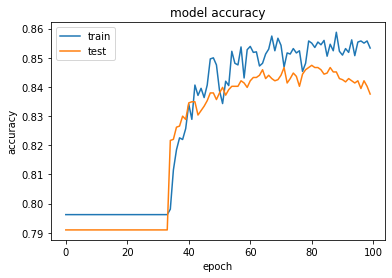

In [240]:
# summarize history for accuracy
plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'])
plt.show()

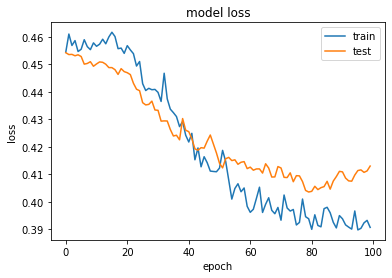

In [241]:
# summarize history for accuracy
plt.plot( model_history.history['loss'])
plt.plot( model_history.history['val_loss'])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'])
plt.show()

In [242]:
## Prediction
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [243]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1490,  117],
       [ 170,  223]], dtype=int64)

In [244]:
## accuracy score
from sklearn.metrics import accuracy_score
score=((accuracy_score(y_test,y_pred))*100).round(2)
print("the accuracy is : {} %".format(score))

the accuracy is : 85.65 %


In [245]:
## get the weights
classifier.get_weights()

[array([[-0.19662656, -0.15916744,  0.7703954 , -0.01734861, -0.0467945 ,
          0.45971018,  0.5206887 , -0.45993385,  0.1657558 , -0.10512888,
          0.25500503],
        [-1.5509397 , -1.302761  , -1.7368869 , -0.97063   , -0.5670841 ,
         -1.0521374 , -1.3808166 , -0.76613337,  0.7773231 ,  0.39898768,
          0.9011468 ],
        [-0.6774785 ,  0.16709201,  0.4059417 , -0.18375774, -0.27778292,
          0.4876602 , -0.079873  ,  0.18389232,  0.14833404, -0.19550547,
          0.02132667],
        [ 0.46510977,  0.25956482,  0.31941277, -0.4864591 ,  0.75091237,
          0.8502106 , -0.53787076, -0.33449194,  0.22639827, -0.76995915,
         -0.12273075],
        [-0.02525859, -0.16981286,  0.10546886, -0.17535597,  2.5324435 ,
         -0.3513702 ,  0.15198812,  0.80210966,  0.06343435,  0.24942705,
         -1.645812  ],
        [-0.5718957 , -0.45011914,  0.9391786 ,  0.758141  , -0.14703329,
          0.07215742, -0.41553214,  0.38689417,  0.12925525, -0.3507646